## Step 1: Load data step and clean missing value: ---------------------------------------------------

In [1]:
import pandas as pan
import numpy as num
import matplotlib.pyplot as matpl

LasVegasTrip = pan.read_csv("LasVegasTripAdvisorReviews-Dataset.csv", sep=";")
LasVegasTrip.isnull().sum()
LasVegasTrip = LasVegasTrip.drop(columns=["Unnamed: 15"])
LasVegasTrip = LasVegasTrip.drop(columns=["status"])
LasVegasTrip = LasVegasTrip.dropna(
    subset=["Hotel name", "Score", "Traveler type", "User continent"])
LasVegasTrip.isnull().sum()

User country          0
Nr. reviews           0
Nr. hotel reviews     0
Helpful votes         0
Score                 0
Period of stay       10
Traveler type         0
Pool                  0
Gym                   0
Tennis court          0
Spa                  16
Casino                0
Free internet         0
Hotel name            0
Hotel stars           0
Nr. rooms             0
User continent        0
Member years          0
Review month          0
Review weekday        0
dtype: int64

## A. HOTEL PERFORMANCE INSIGHTS: ---------------------------------------

1. Find the top 5 hotels with the highest average Score

In [2]:
top5_hotels = (
    LasVegasTrip.groupby("Hotel name")["Score"].mean()
    .sort_values(ascending = False)
    .head(5)
)
print(f" Top 5 hotels: {top5_hotels}")

 Top 5 hotels: Hotel name
Wynn Las Vegas                  4.625000
The Venetian Las Vegas Hotel    4.583333
Marriott's Grand Chateau        4.565217
Encore at wynn Las Vegas        4.541667
Wyndham Grand Desert            4.434783
Name: Score, dtype: float64


2. Using only reviews from users in Europe (User continent = "Europe"), find the top 10 hotels with the highest average Score.

In [3]:
Europe_Reviews = LasVegasTrip[LasVegasTrip["User continent"] == "Europ"]

top10_hotels = (
    LasVegasTrip.groupby("Hotel name")["Score"].mean()
    .sort_values(ascending = False)
    .head(10)
)
print(f"Top 10 hotels: {top10_hotels}")

Top 10 hotels: Hotel name
Wynn Las Vegas                         4.625000
The Venetian Las Vegas Hotel           4.583333
Marriott's Grand Chateau               4.565217
Encore at wynn Las Vegas               4.541667
Wyndham Grand Desert                   4.434783
Trump International Hotel Las Vegas    4.375000
The Palazzo Resort Hotel Casino        4.375000
Tuscany Las Vegas Suites & Casino      4.208333
Bellagio Las Vegas                     4.208333
The Cosmopolitan Las Vegas             4.181818
Name: Score, dtype: float64


3. Among hotels that have all these amenities: Tennis court = YES, Gym = YES, Spa = YES, and Casino = YES, find the bottom 5 hotels by average Score.

In [4]:
amenities_hotels = LasVegasTrip[
    (LasVegasTrip["Tennis court"] == "YES") &
    (LasVegasTrip["Gym"] == "YES") &
    (LasVegasTrip["Spa"] == "YES") &
    (LasVegasTrip["Casino"] == "YES")
]

bottom5_hotels = (
    amenities_hotels.groupby("Hotel name")["Score"].mean()
    .sort_values()
    .head(5)
)
print(f"Bottom 5 hotels: {bottom5_hotels}")

Bottom 5 hotels: Hotel name
Treasure Island- TI Hotel & Casino                     3.913043
Tropicana Las Vegas - A Double Tree by Hilton Hotel    4.000000
Tuscany Las Vegas Suites & Casino                      4.217391
Wynn Las Vegas                                         4.625000
Name: Score, dtype: float64


4. Find the 10 hotels with the largest number of review entries in the dataset. For each of these hotels, identify the top 3 User country values contributing the most reviews

In [5]:
topp10_hotels = (
    LasVegasTrip["Hotel name"].value_counts().head(10)
)
print(f"Top 10 hotels by number of reviews: {topp10_hotels}")

Top 10 hotels by number of reviews: Hotel name
Caesars Palace                            24
The Palazzo Resort Hotel Casino           24
Wynn Las Vegas                            24
Trump International Hotel Las Vegas       24
The Cromwell                              24
Encore at wynn Las Vegas                  24
Tuscany Las Vegas Suites & Casino         24
Hilton Grand Vacations at the Flamingo    24
The Venetian Las Vegas Hotel              24
Bellagio Las Vegas                        24
Name: count, dtype: int64


In [6]:
topp10_hotels_breakdown = {}
for hotel in topp10_hotels.index:
    hotel_data = LasVegasTrip[LasVegasTrip["Hotel name"] == hotel]
    top_countries = hotel_data["User country"].value_counts().head(3)
    topp10_hotels_breakdown[hotel] = top_countries

topp10_hotels_breakdown

{'Caesars Palace': User country
 USA       14
 UK         4
 Canada     3
 Name: count, dtype: int64,
 'The Palazzo Resort Hotel Casino': User country
 USA       10
 Canada     5
 UK         3
 Name: count, dtype: int64,
 'Wynn Las Vegas': User country
 USA       12
 Canada     5
 UK         4
 Name: count, dtype: int64,
 'Trump International Hotel Las Vegas': User country
 USA          11
 UK            2
 Australia     2
 Name: count, dtype: int64,
 'The Cromwell': User country
 USA             15
 Canada           4
 Saudi Arabia     1
 Name: count, dtype: int64,
 'Encore at wynn Las Vegas': User country
 USA         14
 UK           7
 Thailand     1
 Name: count, dtype: int64,
 'Tuscany Las Vegas Suites & Casino': User country
 USA       13
 Canada     4
 UK         2
 Name: count, dtype: int64,
 'Hilton Grand Vacations at the Flamingo': User country
 USA       12
 Canada     4
 Hawaii     2
 Name: count, dtype: int64,
 'The Venetian Las Vegas Hotel': User country
 USA          7


5. a) Count the number of reviews from each User continent. Which continent has the most reviews?

In [7]:
continent_counts = LasVegasTrip["User continent"].value_counts()
print(f"Number of reviews per continent: {continent_counts}")

# The name of the continent with the highest count:
print(f"--> Continent with the highest count: {continent_counts.idxmax()}")

Number of reviews per continent: User continent
North America    287
Europe           115
Oceania           39
Asia              36
Africa             7
South America      7
Name: count, dtype: int64
--> Continent with the highest count: North America


b) For each continent, compute the average Score and the average Helpful votes. Then report the top 3 continents by average Score and the top 3 by average Helpful votes.

In [8]:
continent_stats = (
    LasVegasTrip.groupby("User continent")[["Score", "Helpful votes"]].mean()
    .sort_values(by= "Score", ascending= False)
)
continent_stats

,Score,Helpful votes
User continent,,
South America,4.428571,33.428571
North America,4.163763,33.651568
Oceania,4.153846,25.974359
Europe,4.147826,29.669565
Asia,3.777778,32.694444
Africa,3.428571,29.000000


In [9]:
#  Top 3 continent by average score:
top3_score = continent_stats.sort_values(by="Score", ascending= False)
print(f"-- Top 3 continets by Score: {top3_score}")

# Top 3 continents by average Helpful votes:
top3_con_helpful = continent_stats.sort_values(by= "Helpful votes", ascending= False)
print(f"-- Top 3 continent by Helpful votes: {top3_con_helpful}")

-- Top 3 continets by Score:                    Score  Helpful votes
User continent                         
South America   4.428571      33.428571
North America   4.163763      33.651568
Oceania         4.153846      25.974359
Europe          4.147826      29.669565
Asia            3.777778      32.694444
Africa          3.428571      29.000000
-- Top 3 continent by Helpful votes:                    Score  Helpful votes
User continent                         
North America   4.163763      33.651568
South America   4.428571      33.428571
Asia            3.777778      32.694444
Europe          4.147826      29.669565
Africa          3.428571      29.000000
Oceania         4.153846      25.974359


6. a) For each User country, count how many reviews are for hotels with Free internet = NO. Report the top 3 countries.

In [10]:
no_internet = LasVegasTrip[LasVegasTrip["Free internet"] == "NO"]
top3_countries = no_internet["User country"].value_counts().head(3)
print(f"Top 3 countries with no internet: {top3_countries}")

Top 3 countries with no internet: User country
USA       6
UK        3
Canada    2
Name: count, dtype: int64


b) Among reviews where Free internet = NO, find the top 3 hotels by average Helpful votes.

In [11]:
top3_hotels = (no_internet.groupby("Hotel name")["Helpful votes"].mean()
               .sort_values(ascending= False)
               .head(3))
print(f"Top 3 hotels with no internet by Helpful votes: {top3_hotels}")

Top 3 hotels with no internet by Helpful votes: Hotel name
Monte Carlo Resort&Casino    39.913043
Name: Helpful votes, dtype: float64


7. Find the top 5 hotels (by Nr. rooms) that satisfy all conditions:
- Hotel stars >= 4
- average Score >= 4
- Free internet = YES
- Gym = YES
- Pool = YES

Report: hotel name, rooms, stars, average score, and review count.

In [12]:
LasVegasTrip["Hotel stars"] = pan.to_numeric(LasVegasTrip["Hotel stars"], errors="coerce")
filtered = LasVegasTrip[
    (LasVegasTrip["Hotel stars"] >= 4) &
    (LasVegasTrip["Free internet"] == "YES") &
    (LasVegasTrip["Gym"] == "YES") &
    (LasVegasTrip["Pool"] == "YES") 
]

hotel_stats = (
    filtered.groupby("Hotel name")
    .agg(
        average_score = ("Score","mean"),
        review_count = ("Score","count"),
        rooms = ("Nr. rooms", "first"),
        stars = ("Hotel stars", "first")
    )
)

hotel_stats = hotel_stats[hotel_stats["average_score"] >= 4]
topp5_hotels = hotel_stats.sort_values(by= "rooms", ascending= False).head(5)
print(f"Top 5 hotels by Nr.rooms: {topp5_hotels}")

Top 5 hotels by Nr.rooms:                                  average_score  review_count   rooms  stars
Hotel name                                                                 
The Venetian Las Vegas Hotel          4.583333            24  4027.0    5.0
Bellagio Las Vegas                    4.208333            24  3933.0    5.0
Caesars Palace                        4.125000            24  3348.0    5.0
The Palazzo Resort Hotel Casino       4.375000            24  3025.0    5.0
The Cosmopolitan Las Vegas            4.181818            22  2959.0    5.0


8. a) Which 3 Review month have the most reviews?

In [13]:
top3_months = LasVegasTrip["Review month"].value_counts().head(3) 
print(f"3 Months have most reviews: {top3_months}")

3 Months have most reviews: Review month
January     42
February    42
June        42
Name: count, dtype: int64


b) Which 3 Review weekday have the most reviews?

In [14]:
top3_weekdays = LasVegasTrip["Review weekday"].value_counts().head(3) 
print(f"3 Weekdays have most reviews: {top3_weekdays}")

3 Weekdays have most reviews: Review weekday
Wednesday    82
Tuesday      79
Sunday       75
Name: count, dtype: int64


c) Which Traveler type appears most frequently?

In [15]:
traveler_type = LasVegasTrip["Traveler type"].value_counts()
top_traveler_type = traveler_type.idxmax() 
print(f"Most appreared Traveler types: {top_traveler_type}")

Most appreared Traveler types: Couples


d) Which Period of stay appears most frequently?

In [16]:
top_period = LasVegasTrip["Period of stay"].value_counts().idxmax() 
print(f"Most Period of stay: {top_period}")

Most Period of stay: Dec-Feb


## B. Visual Data Storytelling: --------------------------------------------

9. Create a histogram of the “Score” column.

<function matplotlib.pyplot.show(close=None, block=None)>

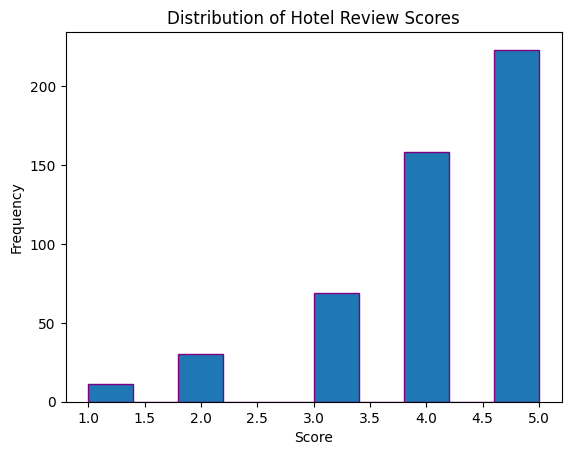

In [17]:
matpl.Figure(figsize= (8,5))
matpl.hist(LasVegasTrip["Score"], bins= 10, edgecolor= "purple")
matpl.title("Distribution of Hotel Review Scores")
matpl.xlabel("Score")
matpl.ylabel("Frequency")
matpl.show

10. Create a boxplot of “Score” by Traveler type

<function matplotlib.pyplot.show(close=None, block=None)>

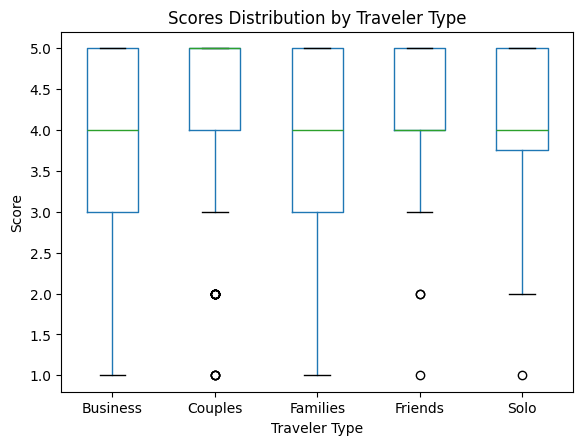

In [18]:
matpl.Figure(figsize= (10,6))
LasVegasTrip.boxplot(column= ["Score"], by= "Traveler type", grid= False)
matpl.title("Scores Distribution by Traveler Type")
matpl.suptitle("")
matpl.xlabel("Traveler Type")
matpl.ylabel("Score")
matpl.show

11. Create a boxplot of Number of Rooms by Hotel stars

<function matplotlib.pyplot.show(close=None, block=None)>

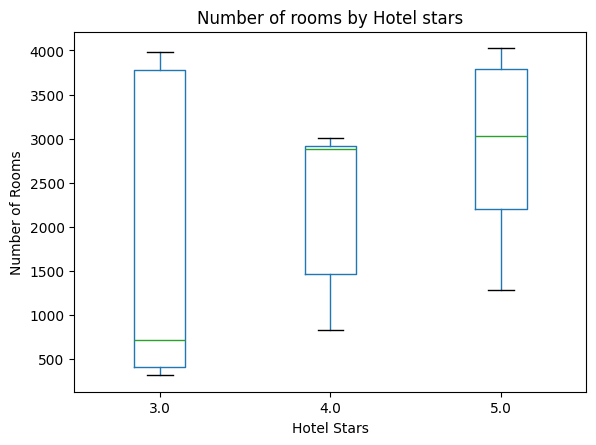

In [19]:
matpl.Figure(figsize= (10,6))
LasVegasTrip.boxplot(column= ["Nr. rooms"], by= "Hotel stars", grid= False)
matpl.title("Number of rooms by Hotel stars")
matpl.suptitle("")
matpl.xlabel("Hotel Stars")
matpl.ylabel("Number of Rooms")
matpl.show

## C. Relationship Exploration: --------------------------------------------------------

12. Is there a relationship between “Member years” and “Helpful votes”? 

Make a scatter plot. Do experienced members get more votes?

<function matplotlib.pyplot.show(close=None, block=None)>

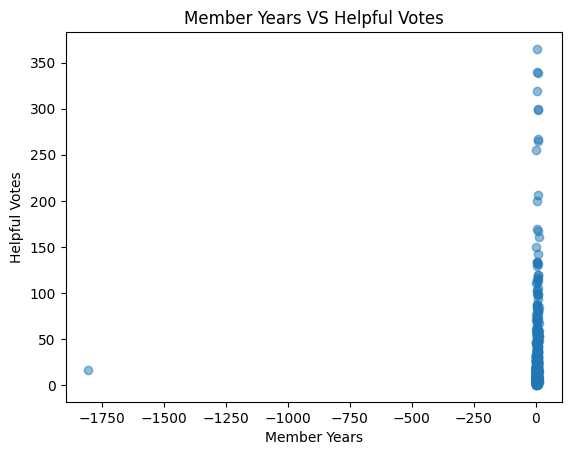

In [20]:
matpl.Figure(figsize= (8,6))
matpl.scatter(LasVegasTrip["Member years"], LasVegasTrip["Helpful votes"], alpha= 0.5)
matpl.title("Member Years VS Helpful Votes")
matpl.xlabel("Member Years")
matpl.ylabel("Helpful Votes")
matpl.show

In [21]:
# Correlation:
LasVegasTrip["Member years"].corr(LasVegasTrip["Helpful votes"])

np.float64(0.024368202229690078)

13. Do hotels with a casino receive higher Scores?

In [22]:
LasVegasTrip.groupby("Casino")["Score"].mean()

Casino
NO     4.191489
YES    4.117117
Name: Score, dtype: float64

14. Do traveler types rate a hotel differently?

In [23]:
hotel_name = "Caesars Palace"

subset = LasVegasTrip[LasVegasTrip["Hotel name"] == hotel_name]
subset.groupby("Traveler type")["Score"].mean()

Traveler type
Business    5.000000
Couples     4.181818
Families    4.125000
Friends     4.666667
Solo        1.000000
Name: Score, dtype: float64

15. Correlation heatmap for numeric variables

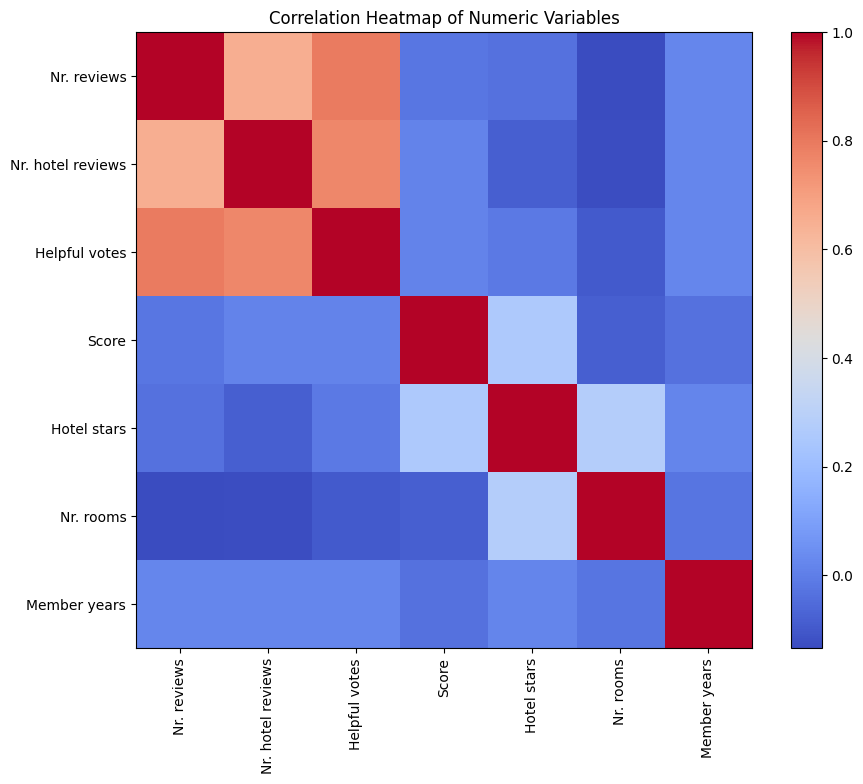

In [24]:
numeric_Trip = LasVegasTrip.select_dtypes(include=["int64","float64"])
corr = numeric_Trip.corr()

matpl.figure(figsize=(10,8))
matpl.imshow(corr, cmap="coolwarm", interpolation="nearest")
matpl.colorbar()
matpl.xticks(range(len(corr.columns)), corr.columns, rotation=90)
matpl.yticks(range(len(corr.columns)), corr.columns)
matpl.title("Correlation Heatmap of Numeric Variables")
matpl.show()
